## Importing Libraries 

In [105]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib as plt 

## Preprocessing data

In [106]:
df=pd.read_csv('train.csv')

In [107]:
df.shape

(450000, 20)

In [108]:
df.head()

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
0,2021-01-26 02:21:35,556753,2021-01-26 00:00:00,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,NaN,NaN,NaN,NaN
1,2021-01-26 02:33:16,556754,2021-01-26 00:00:00,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,NaN,NaN,NaN,3.266667,NaN
2,2021-01-26 02:39:49,556755,2021-01-26 00:00:00,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,NaN,NaN,NaN,9.816667,NaN
3,2021-01-26 02:47:53,556756,2021-01-26 00:00:00,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,NaN,NaN,NaN,17.533333,NaN
4,2021-01-26 03:06:30,556757,2021-01-26 00:00:00,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,NaN,NaN,NaN,1.350000,NaN


In [109]:
df.isnull().sum()

order_time                   0
order_id                     0
order_date                   0
allot_time                   0
accept_time                157
pickup_time               2421
delivered_time            5218
rider_id                     0
first_mile_distance          0
last_mile_distance           0
alloted_orders           16948
delivered_orders         17341
cancelled                    0
undelivered_orders       17341
lifetime_order_count        53
reassignment_method     436256
reassignment_reason     436247
reassigned_order        436247
session_time              3675
cancelled_time          444782
dtype: int64

In [110]:
df['cancelled'].value_counts()

0    444782
1      5218
Name: cancelled, dtype: int64

In [111]:
df.describe()

,order_id,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassigned_order,session_time
count,450000.000000,450000.000000,450000.000000,450000.000000,433052.000000,432659.000000,450000.000000,432659.000000,449947.000000,13753.0,446325.000000
mean,369143.080767,7763.244016,1.229889,2.968873,104.620909,103.950448,0.011596,0.764165,853.640664,1.0,220.474779
std,131146.906408,5592.880135,0.846183,1.884124,90.135492,89.639646,0.107057,1.066473,1502.976162,0.0,176.713853
min,118350.000000,0.000000,0.000134,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,257342.750000,2805.000000,0.539575,1.470000,36.000000,36.000000,0.000000,0.000000,165.000000,1.0,84.100000
50%,369842.500000,6754.000000,1.138700,2.670000,81.000000,81.000000,0.000000,0.000000,396.000000,1.0,175.550000
75%,482342.250000,11965.000000,1.853000,4.220000,147.000000,146.000000,0.000000,1.000000,948.000000,1.0,316.766667
max,594842.000000,21566.000000,42.038100,22.410000,567.000000,562.000000,1.000000,9.000000,30469.000000,1.0,1298.966667


In [112]:
df

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
0,2021-01-26 02:21:35,556753,2021-01-26 00:00:00,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,NaN,NaN,NaN,NaN
1,2021-01-26 02:33:16,556754,2021-01-26 00:00:00,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,NaN,NaN,NaN,3.266667,NaN
2,2021-01-26 02:39:49,556755,2021-01-26 00:00:00,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,NaN,NaN,NaN,9.816667,NaN
3,2021-01-26 02:47:53,556756,2021-01-26 00:00:00,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,NaN,NaN,NaN,17.533333,NaN
4,2021-01-26 03:06:30,556757,2021-01-26 00:00:00,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,NaN,NaN,NaN,1.350000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,2021-02-06 10:03:16,130226,2021-02-06 00:00:00,2021-02-06 10:03:44,2021-02-06 10:04:14,2021-02-06 10:27:29,2021-02-06 10:44:08,1006,0.5789,0.19,4.0,4.0,0,0.0,127.0,NaN,NaN,NaN,369.516667,NaN
449996,2021-02-06 10:03:17,130227,2021-02-06 00:00:00,2021-02-06 10:03:18,2021-02-06 10:04:34,2021-02-06 10:22:17,2021-02-06 10:31:43,279,1.9863,1.19,81.0,81.0,0,0.0,105.0,NaN,NaN,NaN,239.133333,NaN
449997,2021-02-06 10:03:18,130228,2021-02-06 00:00:00,2021-02-06 10:04:06,2021-02-06 10:04:39,2021-02-06 10:19:06,2021-02-06 10:26:56,3161,1.5944,1.61,28.0,28.0,0,0.0,1488.0,NaN,NaN,NaN,204.150000,NaN
449998,2021-02-06 10:03:19,130229,2021-02-06 00:00:00,2021-02-06 10:03:19,2021-02-06 10:05:41,2021-02-06 10:20:39,2021-02-06 10:30:41,9396,2.8939,4.68,72.0,72.0,0,0.0,105.0,NaN,NaN,NaN,65.583333,NaN


In [113]:
df['cancelled'].value_counts()

0    444782
1      5218
Name: cancelled, dtype: int64

In [9]:
df['allot_time'] = pd.to_datetime(df['allot_time'])
df['period'] = (df['allot_time'].dt.hour % 24 + 4) // 4
df['period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)
            

df['period'].value_counts()
import category_encoders as ce
encoder=ce.OneHotEncoder(cols=['period'],return_df=True)
df=encoder.fit_transform(df) 

In [114]:
df['order_time']=pd.to_datetime(df['order_time'])
df['order_time'] = df['order_time'].dt.hour * 3600 + df['order_time'].dt.minute * 60 + df['order_time'].dt.second

df['allot_time']=pd.to_datetime(df['allot_time'])
df['allot_time'] = df['allot_time'].dt.hour * 3600 + df['allot_time'].dt.minute * 60 + df['allot_time'].dt.second

df['accept_time']=pd.to_datetime(df['accept_time'])
df['accept_time'] = df['accept_time'].dt.hour * 3600 + df['accept_time'].dt.minute * 60 + df['accept_time'].dt.second

#df['pickup_time']=pd.to_datetime(df['pickup_time'])
#df['pickup_time'] = df['pickup_time'].dt.hour * 3600 + df['pickup_time'].dt.minute * 60 + df['pickup_time'].dt.second

#df['delivered_time']=pd.to_datetime(df['delivered_time'])
#df['delivered_time'] = df['delivered_time'].dt.hour * 3600 + df['delivered_time'].dt.minute * 60 + df['delivered_time'].dt.second

#df['allot_diff']=df['allot_time']-df['order_time']
#df['accept_diff']=df['accept_time']-df['allot_time']
#df['pickup_diff']=df['pickup_time']-df['accept_time']
#df['deliver_diff']=df['delivered_time']-df['pickup_time']

In [115]:
df['order_time']=df['order_time'].astype('float64')
df['allot_time']=df['allot_time'].astype('float64')
df['accept_time']=df['accept_time'].astype('float64')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_time            450000 non-null  float64
 1   order_id              450000 non-null  int64  
 2   order_date            450000 non-null  object 
 3   allot_time            450000 non-null  float64
 4   accept_time           449843 non-null  float64
 5   pickup_time           447579 non-null  object 
 6   delivered_time        444782 non-null  object 
 7   rider_id              450000 non-null  int64  
 8   first_mile_distance   450000 non-null  float64
 9   last_mile_distance    450000 non-null  float64
 10  alloted_orders        433052 non-null  float64
 11  delivered_orders      432659 non-null  float64
 12  cancelled             450000 non-null  int64  
 13  undelivered_orders    432659 non-null  float64
 14  lifetime_order_count  449947 non-null  float64
 15  

In [97]:
df

,order_time,order_id,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,session_time
0,8495.0,556753,8519.0,8528.0,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,175.550000
1,9196.0,556754,9237.0,9285.0,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,3.266667
2,9589.0,556755,9597.0,9613.0,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,9.816667
3,10073.0,556756,10105.0,10146.0,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,17.533333
4,11190.0,556757,11241.0,11277.0,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,1.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,36196.0,130226,36224.0,36254.0,2021-02-06 10:27:29,2021-02-06 10:44:08,1006,0.5789,0.19,4.0,4.0,0,0.0,127.0,369.516667
449996,36197.0,130227,36198.0,36274.0,2021-02-06 10:22:17,2021-02-06 10:31:43,279,1.9863,1.19,81.0,81.0,0,0.0,105.0,239.133333
449997,36198.0,130228,36246.0,36279.0,2021-02-06 10:19:06,2021-02-06 10:26:56,3161,1.5944,1.61,28.0,28.0,0,0.0,1488.0,204.150000
449998,36199.0,130229,36199.0,36341.0,2021-02-06 10:20:39,2021-02-06 10:30:41,9396,2.8939,4.68,72.0,72.0,0,0.0,105.0,65.583333


/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='first_mile_distance'>

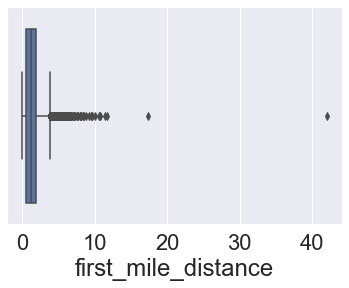

In [66]:
sns.boxplot(df['first_mile_distance'])

In [67]:
df['first_mile_distance']=np.where(df['first_mile_distance']>4,1.853000,df['first_mile_distance'])

/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='first_mile_distance'>

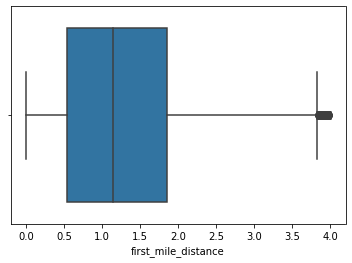

In [14]:
sns.boxplot(df['first_mile_distance'])

/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='last_mile_distance'>

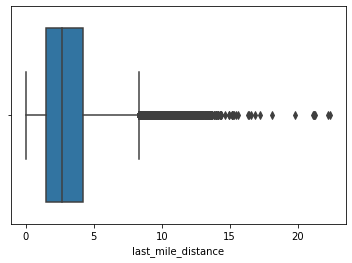

In [15]:
sns.boxplot(df['last_mile_distance'])

In [16]:
df['last_mile_distance']=np.where(df['last_mile_distance']>8,4.220000,df['last_mile_distance'])

/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='last_mile_distance'>

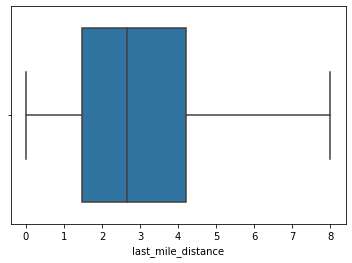

In [17]:
sns.boxplot(df['last_mile_distance'])

In [37]:
df.skew(axis=0).sort_values(ascending=False)

/var/folders/8w/s79vcmt129n8trzthj89p7hm0000gn/T/ipykernel_5549/2516829522.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew(axis=0).sort_values(ascending=False)


cancelled               9.124266
lifetime_order_count    6.756972
undelivered_orders      1.848054
delivered_orders        1.389351
alloted_orders          1.384162
session_time            0.986198
last_mile_distance      0.826771
first_mile_distance     0.758892
rider_id                0.479087
reassigned_order        0.000000
order_id               -0.034267
allot_time             -0.645956
order_time             -0.645978
accept_time            -0.646108
dtype: float64

/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='alloted_orders'>

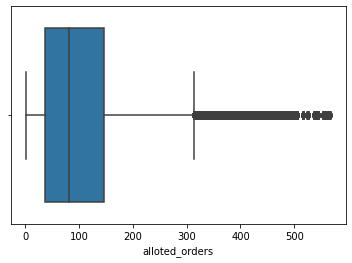

In [19]:
sns.boxplot(df['alloted_orders'])

In [20]:
df['alloted_orders']=np.where(df['alloted_orders']>310,147.000000,df['alloted_orders'])

/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='alloted_orders'>

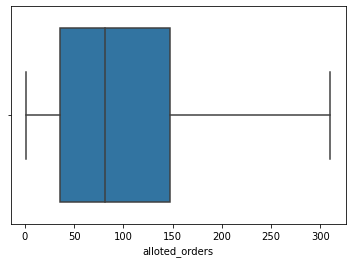

In [21]:
sns.boxplot(df['alloted_orders'])

/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='delivered_orders'>

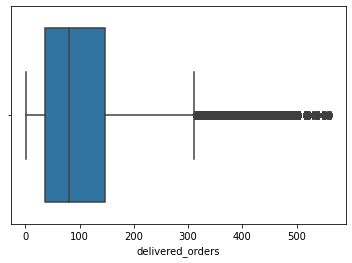

In [22]:
sns.boxplot(df['delivered_orders'])

In [23]:
df['delivered_orders']=np.where(df['delivered_orders']>310,146.000000,df['delivered_orders'])

/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='delivered_orders'>

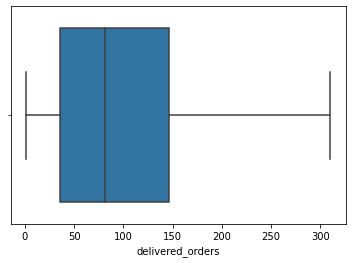

In [24]:
sns.boxplot(df['delivered_orders'])

In [25]:
df.skew(axis=0).sort_values(ascending=False)

/var/folders/8w/s79vcmt129n8trzthj89p7hm0000gn/T/ipykernel_3892/2516829522.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew(axis=0).sort_values(ascending=False)


period_6                212.125670
period_1                 25.761844
allot_diff               14.952845
cancelled                 9.124266
lifetime_order_count      6.756972
period_2                  2.096028
undelivered_orders        1.848054
period_3                  1.739960
period_5                  1.037379
session_time              0.986198
delivered_orders          0.789651
alloted_orders            0.778542
rider_id                  0.479087
last_mile_distance        0.474789
first_mile_distance       0.359003
period_4                  0.329939
reassigned_order          0.000000
order_id                 -0.034267
allot_time               -0.645956
order_time               -0.645978
accept_time              -0.646108
accept_diff             -40.524778
dtype: float64

/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='undelivered_orders'>

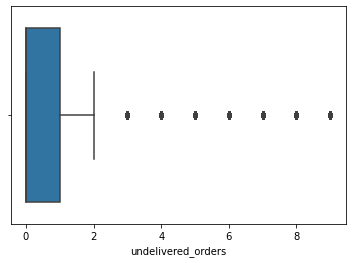

In [26]:
sns.boxplot(df['undelivered_orders'])

In [27]:
df['undelivered_orders']=np.where(df['undelivered_orders']>2,1,df['undelivered_orders'])

/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='undelivered_orders'>

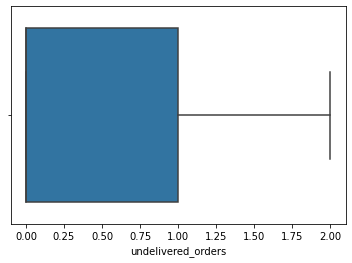

In [28]:
sns.boxplot(df['undelivered_orders'])

Dropping the 4 columns with maximum missing values 

In [38]:
df

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
0,8495,556753,2021-01-26 00:00:00,8519,8528.0,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,NaN,NaN,NaN,NaN
1,9196,556754,2021-01-26 00:00:00,9237,9285.0,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,NaN,NaN,NaN,3.266667,NaN
2,9589,556755,2021-01-26 00:00:00,9597,9613.0,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,NaN,NaN,NaN,9.816667,NaN
3,10073,556756,2021-01-26 00:00:00,10105,10146.0,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,NaN,NaN,NaN,17.533333,NaN
4,11190,556757,2021-01-26 00:00:00,11241,11277.0,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,NaN,NaN,NaN,1.350000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,36196,130226,2021-02-06 00:00:00,36224,36254.0,2021-02-06 10:27:29,2021-02-06 10:44:08,1006,0.5789,0.19,4.0,4.0,0,0.0,127.0,NaN,NaN,NaN,369.516667,NaN
449996,36197,130227,2021-02-06 00:00:00,36198,36274.0,2021-02-06 10:22:17,2021-02-06 10:31:43,279,1.9863,1.19,81.0,81.0,0,0.0,105.0,NaN,NaN,NaN,239.133333,NaN
449997,36198,130228,2021-02-06 00:00:00,36246,36279.0,2021-02-06 10:19:06,2021-02-06 10:26:56,3161,1.5944,1.61,28.0,28.0,0,0.0,1488.0,NaN,NaN,NaN,204.150000,NaN
449998,36199,130229,2021-02-06 00:00:00,36199,36341.0,2021-02-06 10:20:39,2021-02-06 10:30:41,9396,2.8939,4.68,72.0,72.0,0,0.0,105.0,NaN,NaN,NaN,65.583333,NaN


In [117]:
df.drop(columns=['reassignment_method','reassignment_reason','reassigned_order','cancelled_time'],axis=1,inplace=True)

In [118]:
df.drop(columns=['order_date'],axis=1,inplace=True)

In [119]:
df.shape 

(450000, 15)

In [120]:
df['delivered_orders'].isnull().sum()

17341

In [121]:
df['undelivered_orders'].isnull().sum()

17341

Delivered,undelivered orders contain null values to be dropped

In [122]:
df.isnull().sum()

order_time                  0
order_id                    0
allot_time                  0
accept_time               157
pickup_time              2421
delivered_time           5218
rider_id                    0
first_mile_distance         0
last_mile_distance          0
alloted_orders          16948
delivered_orders        17341
cancelled                   0
undelivered_orders      17341
lifetime_order_count       53
session_time             3675
dtype: int64

In [123]:
df['alloted_orders'].fillna(df['alloted_orders'].median(), inplace=True)
df['delivered_orders'].fillna(df['delivered_orders'].median(), inplace=True)
df['undelivered_orders'].fillna(df['undelivered_orders'].median(), inplace=True)
df['session_time'].fillna(df['session_time'].median(), inplace=True)
df['accept_time'].fillna(df['accept_time'].median(), inplace=True)
#df['accept_diff'].fillna(df['accept_diff'].median(), inplace=True)
#df['pickup_diff'].fillna(df['pickup_diff'].median(), inplace=True)
#df['deliver_diff'].fillna(df['deliver_diff'].median(), inplace=True)

In [126]:
df.isnull().sum()

order_time                 0
order_id                   0
allot_time                 0
accept_time                0
pickup_time             2421
delivered_time          5218
rider_id                   0
first_mile_distance        0
last_mile_distance         0
alloted_orders             0
delivered_orders           0
cancelled                  0
undelivered_orders         0
lifetime_order_count      53
session_time               0
dtype: int64

In [128]:
df.drop(columns=['pickup_time','delivered_time'],axis=1,inplace=True)

In [129]:
df_new=df
df_new.isnull().sum()

order_time               0
order_id                 0
allot_time               0
accept_time              0
rider_id                 0
first_mile_distance      0
last_mile_distance       0
alloted_orders           0
delivered_orders         0
cancelled                0
undelivered_orders       0
lifetime_order_count    53
session_time             0
dtype: int64

In [130]:
df['lifetime_order_count'].fillna(df['lifetime_order_count'].median(), inplace=True) # dropping null values in all the rows

In [131]:
df_new.isnull().sum()

order_time              0
order_id                0
allot_time              0
accept_time             0
rider_id                0
first_mile_distance     0
last_mile_distance      0
alloted_orders          0
delivered_orders        0
cancelled               0
undelivered_orders      0
lifetime_order_count    0
session_time            0
dtype: int64

No more missing values in dataframe

In [132]:
df_new.shape

(450000, 13)

In [133]:
df_new.head()

,order_time,order_id,allot_time,accept_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,session_time
0,8495.0,556753,8519.0,8528.0,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,175.550000
1,9196.0,556754,9237.0,9285.0,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,3.266667
2,9589.0,556755,9597.0,9613.0,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,9.816667
3,10073.0,556756,10105.0,10146.0,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,17.533333
4,11190.0,556757,11241.0,11277.0,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,1.350000


In [134]:
#df_new.drop(columns='allot_time',inplace=True,axis=1)

<AxesSubplot:>

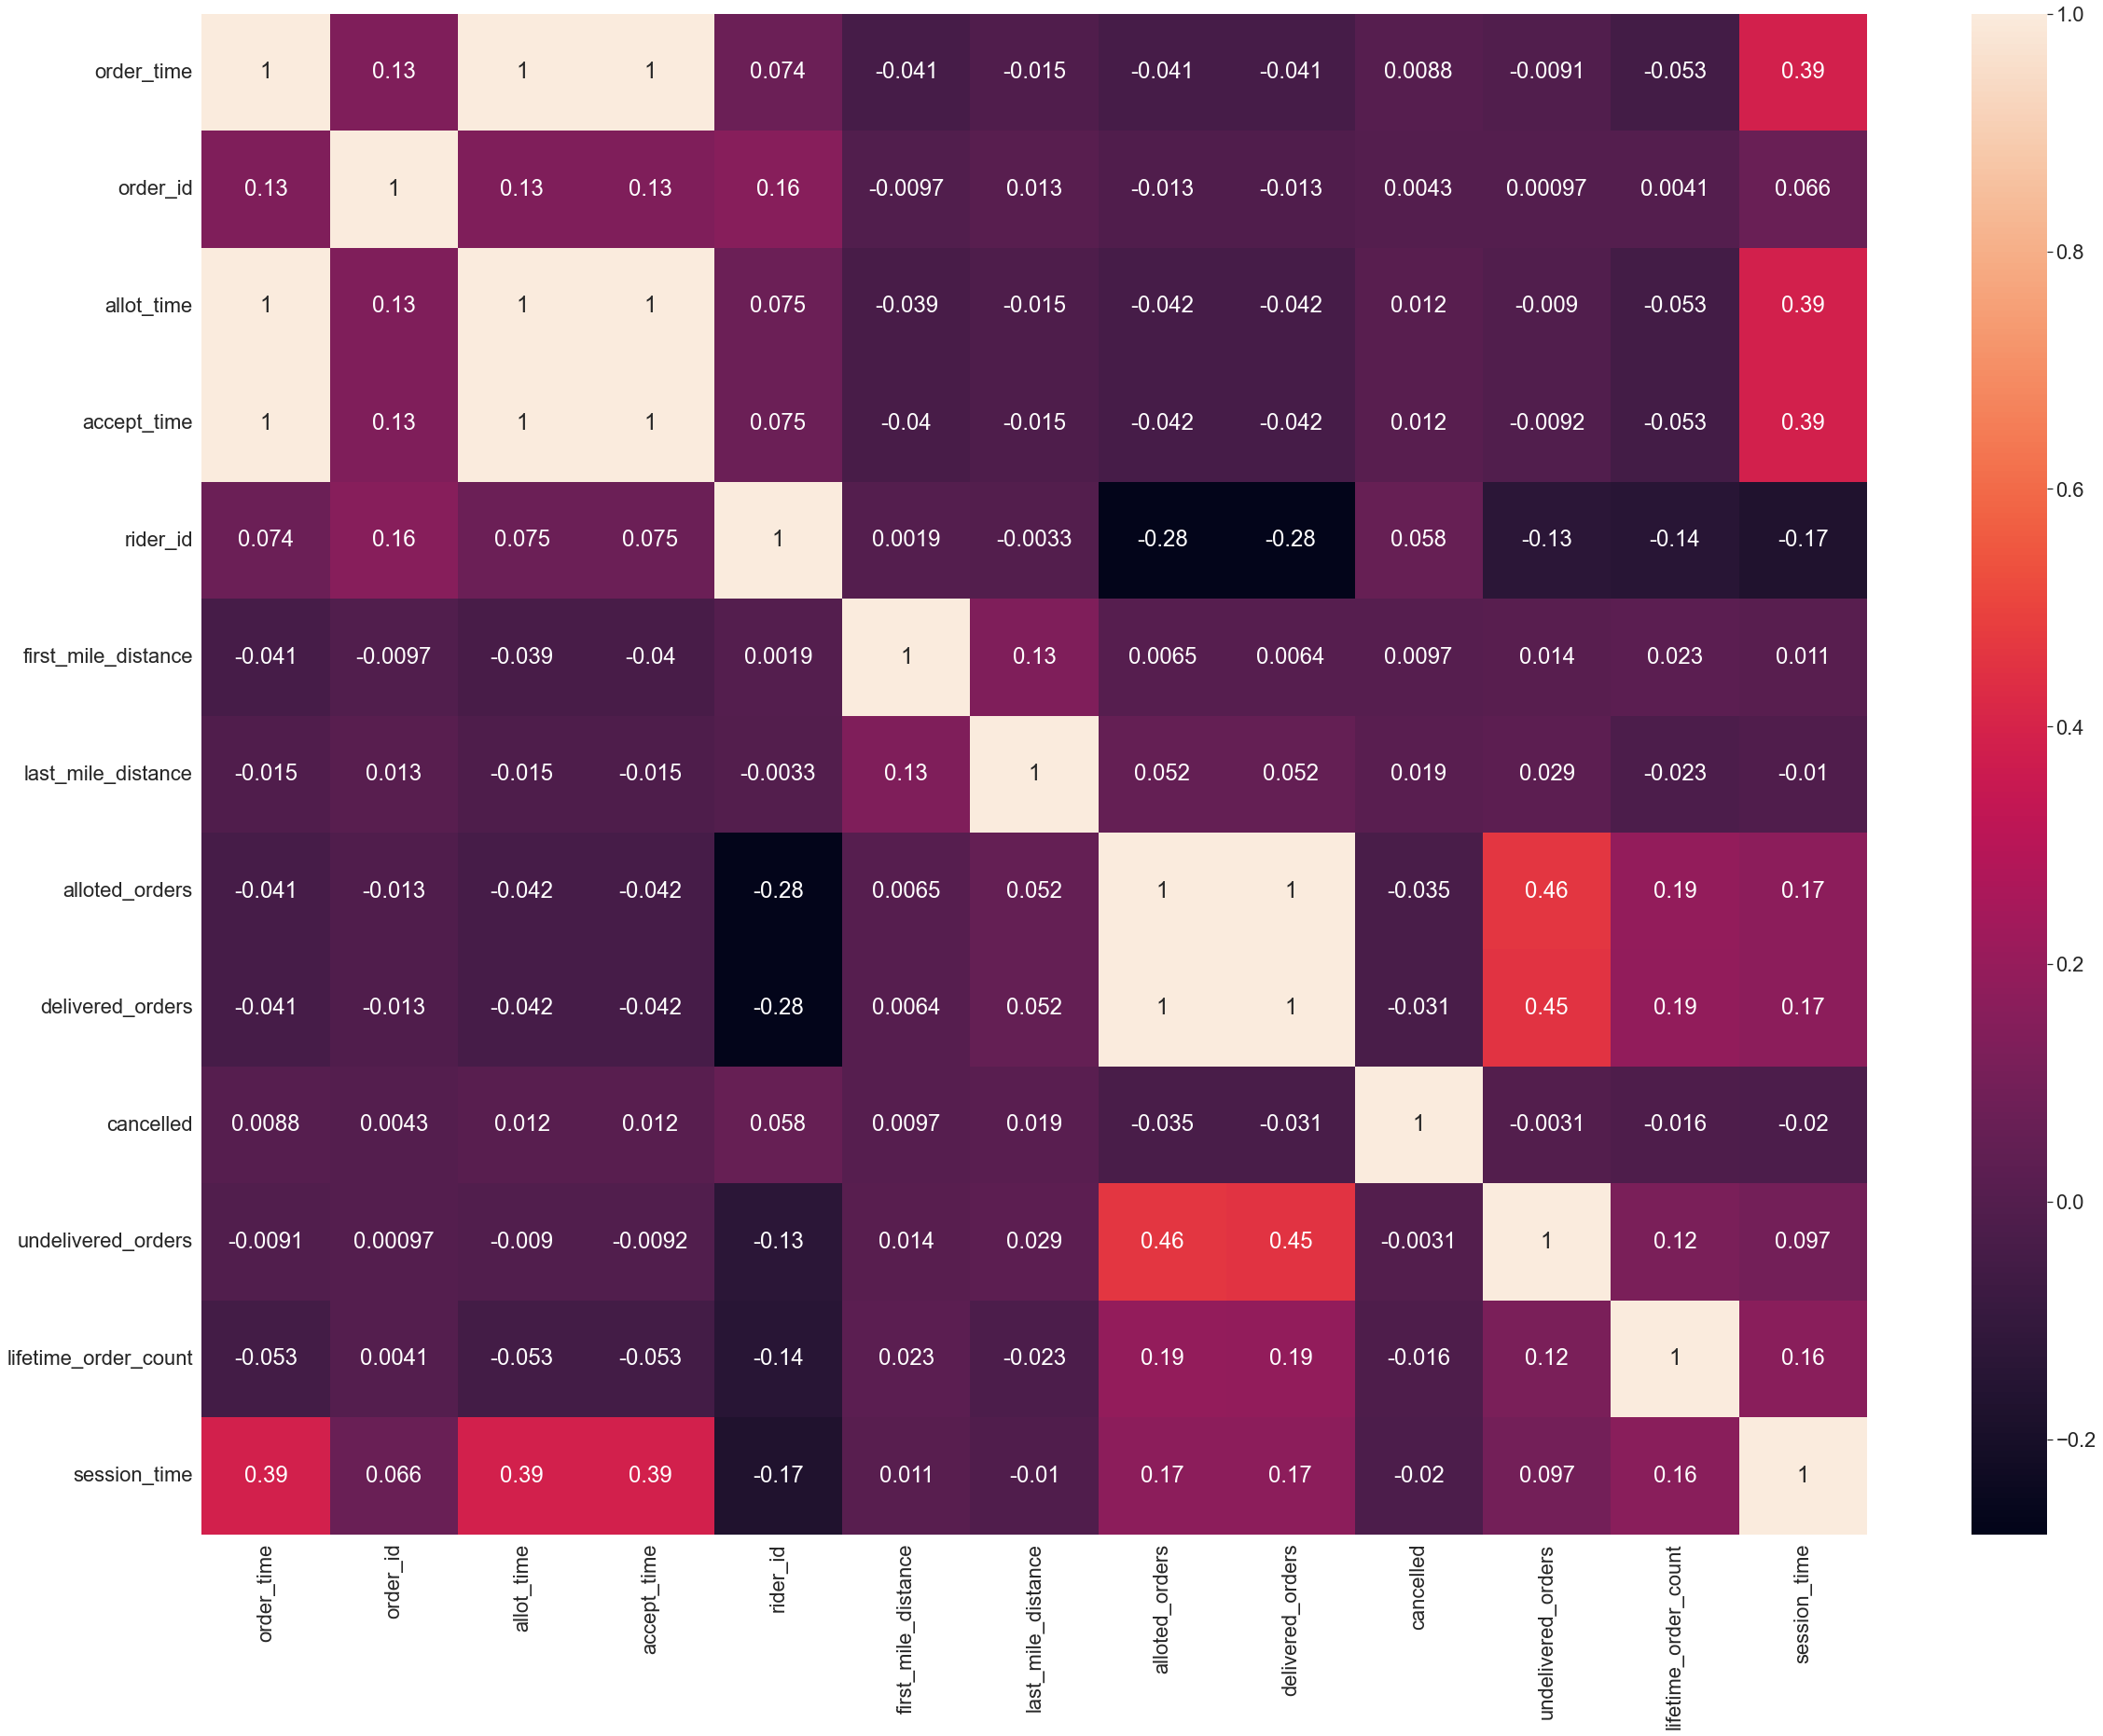

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(40,30))
sns.heatmap(df_new.corr(),annot=True)

In [120]:
#df_new.drop(columns=['lifetime_order_count','session_time','alloted_orders','delivered_orders'],axis=1,inplace=True)

In [136]:
df_new['cancelled'].value_counts()

0    444782
1      5218
Name: cancelled, dtype: int64

In [53]:
#df_new.drop('rider_id',axis=1,inplace=True)

In [137]:
df_new.shape

(450000, 13)

In [138]:
X=df_new.drop(columns=['cancelled'],axis=1)
y=df_new['cancelled']

In [139]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot


In [129]:
def get_models():
    models = dict()
    #models['lr'] = LogisticRegression()
    #models['knn'] = KNeighborsClassifier()
    #models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    return models

In [130]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [131]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import StackingClassifier
def get_stacking():
    	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
	#define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

In [ ]:
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))
# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(X, y)

/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier()),
                               ('cart', DecisionTreeClassifier())],
                   final_estimator=LogisticRegression())

In [133]:
svm=SVC(C=50,gamma='scale')


In [134]:
svm.fit(X, y)

In [146]:
Q1 = df_new.quantile(0.25)
Q3 = df_new.quantile(0.75)
IQR = Q3 - Q1
df_what = df_new[~((df_new < (Q1 - 1.5 * IQR)) |(df_new > (Q3 + 1.5 * IQR))).any(axis=1)]

In [155]:
y.value_counts()

0    444782
1      5218
Name: cancelled, dtype: int64

In [161]:
dtc_new=DecisionTreeClassifier()

In [162]:
dtc_new.fit(X,y)

DecisionTreeClassifier()

In [163]:
y_pred=dtc_new.predict(X)

In [164]:
a=y.values.tolist()

In [165]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score
print(f'Accuracy Score: {accuracy_score(y,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y, y_pred)}')
print(f'Recall score: {recall_score(y,y_pred)}')
print(f'F1 score: {f1_score(y,y_pred)}')

Accuracy Score: 1.0
Confusion Matrix: 
[[444782      0]
 [     0   5218]]
Area Under Curve: 1.0
Recall score: 1.0
F1 score: 1.0


In [168]:
X

,order_time,order_id,allot_time,accept_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,session_time
0,8495.0,556753,8519.0,8528.0,11696,1.5666,2.65,46.0,46.0,0.0,621.0,175.550000
1,9196.0,556754,9237.0,9285.0,18117,2.5207,2.76,8.0,8.0,0.0,105.0,3.266667
2,9589.0,556755,9597.0,9613.0,18623,2.2074,4.80,1.0,1.0,0.0,66.0,9.816667
3,10073.0,556756,10105.0,10146.0,15945,2.1894,6.38,1.0,1.0,0.0,127.0,17.533333
4,11190.0,556757,11241.0,11277.0,17589,2.7870,4.01,34.0,34.0,0.0,84.0,1.350000
...,...,...,...,...,...,...,...,...,...,...,...,...
449995,36196.0,130226,36224.0,36254.0,1006,0.5789,0.19,4.0,4.0,0.0,127.0,369.516667
449996,36197.0,130227,36198.0,36274.0,279,1.9863,1.19,81.0,81.0,0.0,105.0,239.133333
449997,36198.0,130228,36246.0,36279.0,3161,1.5944,1.61,28.0,28.0,0.0,1488.0,204.150000
449998,36199.0,130229,36199.0,36341.0,9396,2.8939,4.68,72.0,72.0,0.0,105.0,65.583333


In [166]:
test=pd.read_csv('test.csv')

In [167]:
test

,order_time,order_id,order_date,allot_time,accept_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time
0,2021-02-06 10:03:24,130231,2021-02-06 00:00:00,2021-02-06 10:03:49,2021-02-06 10:04:15,12884,1.658500,4.54,216.0,215.0,1.0,747.0,NaN,NaN,NaN,273.400000
1,2021-02-06 10:03:26,130232,2021-02-06 00:00:00,2021-02-06 10:03:27,2021-02-06 10:03:36,3541,2.070900,5.84,52.0,52.0,0.0,75.0,NaN,NaN,NaN,252.100000
2,2021-02-06 10:03:27,130233,2021-02-06 00:00:00,2021-02-06 10:04:14,2021-02-06 10:05:34,603,1.388400,0.99,289.0,289.0,0.0,2214.0,NaN,NaN,NaN,241.383333
3,2021-02-06 10:03:29,130234,2021-02-06 00:00:00,2021-02-06 10:03:30,2021-02-06 10:03:53,3414,1.903900,2.59,125.0,122.0,3.0,1020.0,NaN,NaN,NaN,291.933333
4,2021-02-06 10:03:35,130235,2021-02-06 00:00:00,2021-02-06 10:03:43,2021-02-06 10:04:43,1426,0.827500,0.94,352.0,350.0,2.0,7284.0,NaN,NaN,NaN,247.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144839,2021-02-09 20:13:39,41184,2021-02-09 00:00:00,2021-02-09 20:13:40,2021-02-09 20:13:49,7141,1.417000,3.96,52.0,52.0,0.0,413.0,NaN,NaN,NaN,179.266667
144840,2021-02-09 20:21:36,41185,2021-02-09 00:00:00,2021-02-09 20:21:59,2021-02-09 20:22:33,8113,0.775600,1.61,95.0,93.0,2.0,284.0,NaN,NaN,NaN,244.400000
144841,2021-02-09 20:24:25,41186,2021-02-09 00:00:00,2021-02-09 20:25:03,2021-02-09 20:26:10,5040,2.049400,1.26,77.0,77.0,0.0,119.0,NaN,NaN,NaN,259.000000
144842,2021-02-09 20:28:07,41187,2021-02-09 00:00:00,2021-02-09 20:28:29,2021-02-09 20:28:53,2946,0.080494,5.50,231.0,228.0,3.0,1759.0,NaN,NaN,NaN,814.283333


In [67]:
test['allot_time'] = pd.to_datetime(test['allot_time'])
test['period'] = (test['allot_time'].dt.hour % 24 + 4) // 4
test['period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)
            

test['period'].value_counts()
import category_encoders as ce
encoder=ce.OneHotEncoder(cols=['period'],return_df=True)
test=encoder.fit_transform(test) 

In [68]:
test

,order_time,order_id,order_date,allot_time,accept_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,...,reassignment_method,reassignment_reason,reassigned_order,session_time,period_1,period_2,period_3,period_4,period_5,period_6
0,2021-02-06 10:03:24,130231,2021-02-06 00:00:00,2021-02-06 10:03:49,2021-02-06 10:04:15,12884,1.658500,4.54,216.0,215.0,...,NaN,NaN,NaN,273.400000,1,0,0,0,0,0
1,2021-02-06 10:03:26,130232,2021-02-06 00:00:00,2021-02-06 10:03:27,2021-02-06 10:03:36,3541,2.070900,5.84,52.0,52.0,...,NaN,NaN,NaN,252.100000,1,0,0,0,0,0
2,2021-02-06 10:03:27,130233,2021-02-06 00:00:00,2021-02-06 10:04:14,2021-02-06 10:05:34,603,1.388400,0.99,289.0,289.0,...,NaN,NaN,NaN,241.383333,1,0,0,0,0,0
3,2021-02-06 10:03:29,130234,2021-02-06 00:00:00,2021-02-06 10:03:30,2021-02-06 10:03:53,3414,1.903900,2.59,125.0,122.0,...,NaN,NaN,NaN,291.933333,1,0,0,0,0,0
4,2021-02-06 10:03:35,130235,2021-02-06 00:00:00,2021-02-06 10:03:43,2021-02-06 10:04:43,1426,0.827500,0.94,352.0,350.0,...,NaN,NaN,NaN,247.133333,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144839,2021-02-09 20:13:39,41184,2021-02-09 00:00:00,2021-02-09 20:13:40,2021-02-09 20:13:49,7141,1.417000,3.96,52.0,52.0,...,NaN,NaN,NaN,179.266667,0,0,0,1,0,0
144840,2021-02-09 20:21:36,41185,2021-02-09 00:00:00,2021-02-09 20:21:59,2021-02-09 20:22:33,8113,0.775600,1.61,95.0,93.0,...,NaN,NaN,NaN,244.400000,0,0,0,1,0,0
144841,2021-02-09 20:24:25,41186,2021-02-09 00:00:00,2021-02-09 20:25:03,2021-02-09 20:26:10,5040,2.049400,1.26,77.0,77.0,...,NaN,NaN,NaN,259.000000,0,0,0,1,0,0
144842,2021-02-09 20:28:07,41187,2021-02-09 00:00:00,2021-02-09 20:28:29,2021-02-09 20:28:53,2946,0.080494,5.50,231.0,228.0,...,NaN,NaN,NaN,814.283333,0,0,0,1,0,0


In [169]:
test['order_time']=pd.to_datetime(test['order_time'])
test['order_time'] = test['order_time'].dt.hour * 3600 + test['order_time'].dt.minute * 60 + test['order_time'].dt.second

test['allot_time']=pd.to_datetime(test['allot_time'])
test['allot_time'] = test['allot_time'].dt.hour * 3600 + test['allot_time'].dt.minute * 60 + test['allot_time'].dt.second

test['accept_time']=pd.to_datetime(test['accept_time'])
test['accept_time'] = test['accept_time'].dt.hour * 3600 + test['accept_time'].dt.minute * 60 + test['accept_time'].dt.second

#test['pickup_time']=pd.to_datetime(test['pickup_time'])
#test['pickup_time'] = test['pickup_time'].dt.hour * 3600 + test['pickup_time'].dt.minute * 60 + test['pickup_time'].dt.second

#test['delivered_time']=pd.to_datetime(test['delivered_time'])
#test['delivered_time'] = test['delivered_time'].dt.hour * 3600 + test['delivered_time'].dt.minute * 60 + test['delivered_time'].dt.second

#test['allot_diff']=test['allot_time']-test['order_time']
#test['accept_diff']=test['accept_time']-test['allot_time']
#test['pickup_diff']=test['pickup_time']-test['accept_time']
#test['deliver_diff']=test['delivered_time']-test['pickup_time']

In [170]:
df['order_time']=df['order_time'].astype('float64')
df['allot_time']=df['allot_time'].astype('float64')
df['accept_time']=df['accept_time'].astype('float64')

In [171]:
test.drop(columns=['reassignment_method','reassignment_reason','reassigned_order'],axis=1,inplace=True)
#test.drop(columns=['session_time'],axis=1,inplace=True)

In [172]:
X_test=test.drop(columns=['order_date'],axis=1)

In [173]:
X_test

,order_time,order_id,allot_time,accept_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,session_time
0,36204,130231,36229,36255.0,12884,1.658500,4.54,216.0,215.0,1.0,747.0,273.400000
1,36206,130232,36207,36216.0,3541,2.070900,5.84,52.0,52.0,0.0,75.0,252.100000
2,36207,130233,36254,36334.0,603,1.388400,0.99,289.0,289.0,0.0,2214.0,241.383333
3,36209,130234,36210,36233.0,3414,1.903900,2.59,125.0,122.0,3.0,1020.0,291.933333
4,36215,130235,36223,36283.0,1426,0.827500,0.94,352.0,350.0,2.0,7284.0,247.133333
...,...,...,...,...,...,...,...,...,...,...,...,...
144839,72819,41184,72820,72829.0,7141,1.417000,3.96,52.0,52.0,0.0,413.0,179.266667
144840,73296,41185,73319,73353.0,8113,0.775600,1.61,95.0,93.0,2.0,284.0,244.400000
144841,73465,41186,73503,73570.0,5040,2.049400,1.26,77.0,77.0,0.0,119.0,259.000000
144842,73687,41187,73709,73733.0,2946,0.080494,5.50,231.0,228.0,3.0,1759.0,814.283333


In [174]:
X_test.isnull().sum()

order_time                 0
order_id                   0
allot_time                 0
accept_time               68
rider_id                   0
first_mile_distance        0
last_mile_distance         0
alloted_orders          4773
delivered_orders        4884
undelivered_orders      4884
lifetime_order_count     778
session_time            5054
dtype: int64

In [175]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp = imp.fit(X_test[['alloted_orders','delivered_orders','undelivered_orders','lifetime_order_count']])

In [176]:
X_test[['alloted_orders','delivered_orders','undelivered_orders','lifetime_order_count']]=imp.transform(X_test[['alloted_orders','delivered_orders','undelivered_orders','lifetime_order_count']])

In [182]:
X_test['session_time'].fillna(X_test['session_time'].median(), inplace=True)

In [183]:
X_test

,order_time,order_id,allot_time,accept_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,session_time
0,36204,130231,36229,36255.0,12884,1.658500,4.54,216.0,215.0,1.0,747.0,273.400000
1,36206,130232,36207,36216.0,3541,2.070900,5.84,52.0,52.0,0.0,75.0,252.100000
2,36207,130233,36254,36334.0,603,1.388400,0.99,289.0,289.0,0.0,2214.0,241.383333
3,36209,130234,36210,36233.0,3414,1.903900,2.59,125.0,122.0,3.0,1020.0,291.933333
4,36215,130235,36223,36283.0,1426,0.827500,0.94,352.0,350.0,2.0,7284.0,247.133333
...,...,...,...,...,...,...,...,...,...,...,...,...
144839,72819,41184,72820,72829.0,7141,1.417000,3.96,52.0,52.0,0.0,413.0,179.266667
144840,73296,41185,73319,73353.0,8113,0.775600,1.61,95.0,93.0,2.0,284.0,244.400000
144841,73465,41186,73503,73570.0,5040,2.049400,1.26,77.0,77.0,0.0,119.0,259.000000
144842,73687,41187,73709,73733.0,2946,0.080494,5.50,231.0,228.0,3.0,1759.0,814.283333


In [184]:
X_test.isnull().sum()

order_time               0
order_id                 0
allot_time               0
accept_time             68
rider_id                 0
first_mile_distance      0
last_mile_distance       0
alloted_orders           0
delivered_orders         0
undelivered_orders       0
lifetime_order_count     0
session_time             0
dtype: int64

In [185]:
X_test['accept_time'].fillna(X_test['accept_time'].median(), inplace=True)

In [180]:
#X_test.drop(columns=['rider_id'],inplace=True)

In [83]:
#X_test.drop(columns=['order_id'],inplace=True)

In [186]:
y_test=dtc_new.predict(X_test)

In [187]:
y_test

array([0, 0, 0, ..., 0, 1, 0])

In [188]:
y_test.shape

(144844,)

In [189]:
final=pd.DataFrame()

In [190]:
final['order_id']=test['order_id']

In [191]:
final['cancelled']=dtc_new.predict(X_test)

In [192]:
final

,order_id,cancelled
0,130231,0
1,130232,0
2,130233,0
3,130234,0
4,130235,0
...,...,...
144839,41184,1
144840,41185,1
144841,41186,0
144842,41187,1


In [193]:
final.to_csv('submit_1.csv', index=False)

In [194]:
X_test.isnull().sum()

order_time              0
order_id                0
allot_time              0
accept_time             0
rider_id                0
first_mile_distance     0
last_mile_distance      0
alloted_orders          0
delivered_orders        0
undelivered_orders      0
lifetime_order_count    0
session_time            0
dtype: int64

In [195]:
final['cancelled'].value_counts()

0    117556
1     27288
Name: cancelled, dtype: int64

In [196]:
final.shape

(144844, 2)